<a href="https://colab.research.google.com/github/GwanMuk/AI_Study24/blob/master/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 쇼핑몰에서는 럭키백을 판매하기로 하였다.

럭키백에는 생성이 들어있는데 종류가 7가지로 랜덤하게 들어 있다.

럭키백의 확률을 표시해야 함 : 들어있는 7가지의 생선의 확률이 필요함

In [ ]:
# 럭키백의 확률 : 생선이 7마리라고 가정함
# 생선의 크기, 무게 (길이, 높이, 두께, 대각선의 길이, 무게)

 K-최근접 알고리즘을 이용해보면 회귀일까 분류일까를 먼저 고민해야 함

 확률을 알고 싶은 것이기 때문에 회귀를 사용해보자

* 샘플 10개중에 농어가 3마리면?  3 / 10 = 0.3
* 빙어가 5마리면? 5 / 10 = 0.5
* 도미가 2마리면? 2 / 10 = 0.2  총 100%

사이킷런의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확률 계산도 해줌

In [3]:
# 샘플 데이터 준비
import pandas as pd                                 # 판다스로 csv파일을 처리함
fish = pd.read_csv('https://bit.ly/fish_csv_data')  # 웹에 있는 파일을 가져옴
fish.head()                                         # 제일 위쪽 데이터 5개를 보여줌
# 종(스피시즈), 무게, 길이, 대각선, 키, 너비(두께)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
print(pd.unique(fish['Species'])) # 유니크한 종류를 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
# Bream : 브림(도미)
# Roach : 로치(대구)
# Whitefish : 잉어
# Parkki : 붕어
# Perch : 농어
# Pike : 가물치
# Smelt : 빙어
# 7개 종의 어종이 분포되어 있음

# 분석용 입력값 생성
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5]) # 앞에서 부터 5개만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
# fish[['Species']] 이렇게 하면 3차원 배열됨 (주의할 것)
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [10]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

print(train_input.shape, test_input.shape)
# 훈련용은 119개의 5개의 특성
# 테스트는 40개의 5개 특성

(119, 5) (40, 5)


In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()    # 사이킷런의 전처리용(스케일 조정 : 표준점수화 )
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [13]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier  # 분류용

kn = KNeighborsClassifier(n_neighbors=3)            # 이웃 3개 참고
kn.fit(train_scaled, train_target)                  # 훈련 시작

print(kn.score(train_scaled, train_target))         # 훈련 점수 : 89
print(kn.score(test_scaled, test_target))           # 테스트 점수 : 85

0.8907563025210085
0.85


In [14]:
# 전에는 0과 1을 찾는 이진분류였지만 지금 타겟에 7개의 어종을 넣었음
print(kn.classes_)
# 7개의 생선 어종이 들어있다. 2개이상 클래스가 포함된 문제를 다중 분류라고 함.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [16]:
print(kn.predict(test_scaled[:5]))
# 처음 5개의 샘플을 타겟값 에측 해보면 아래와 같다

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [15]:
print(test_scaled[:5])

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [18]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
# 사이킷런이 번거로운 연산을 수행해줌으로 쉽게 결과가 나옴
print(np.round(proba, decimals=4))
# 소수점 네번째자리까지 표시(다섯번째에서 반올림)
# Bream, Parkki, Perch, Pike, Roach, Smelt, Whitefish 순서

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']

결과를 확인 할 수 있다.

In [19]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 필요함
distancees, indexes = kn.kneighbors(test_scaled[3:4])   # 4번째 값을 자세히 보자
print(train_target[indexes])
#               Perch    Roach
# [0.   0.    0.6667 0.   0.3333 0.   0.    ]
# Perch 2/3, Roach1/3 이기 때문에 7개를 확율로 제공되지 못함
# 이유 : n_neighbors = 3 으로 했기 떄문

[['Roach' 'Perch' 'Perch']]


In [ ]:
# 알고리즘 변경해보자 : 로지스틱 회귀(LogisticRegreeion)
# 로지스틱 회귀는 사이킷런에서 제공함 from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀는 이름이 회귀지만 분류하는 모델이다

# 선형회귀와 동일하게 선형 방적싱을 학습한다
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# a, b ,c ,d, e, f는 각 항목에 대한 가중치(중요도, 계수)이다
# z는 어떤 값도 가능하다. 하지만 확율이 되려면 0~1(0% ~ 100%)사이 값이여야 한다.
# z가 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 되도록 바꾸는 방법은 시그모이드 함수, 로지스틱 함수를 사용한다.

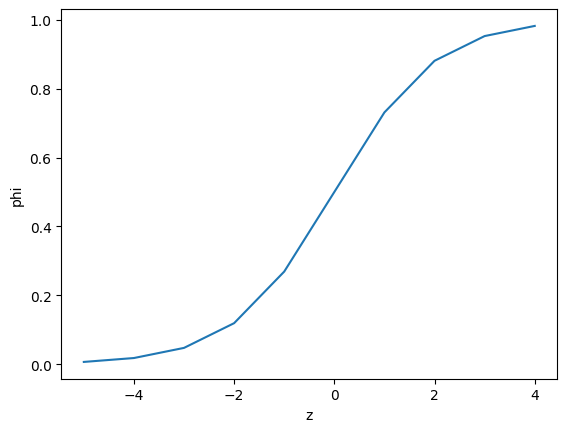

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용: z가 무한하게 큰 음수 일 경우 0에 가까워짐, z가 무한하게 큰 양수일 때 1에 가까워 짐
z = np.arange(-5, 5 -0.1)   # -5 ~ 5까지 0.1간격으로 배열 생성
phi = 1 / (1+np.exp(-z))    # np.exp() 함수로 시그모이드 적용

plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
# 선형방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다.
# 이렇게 하면 0~1사이 값을 0~100% 확률로 해석 할 수 있다.

# 훈련 전에 2진분류부터 알아보자.
# 2진 분류인 경우에는 시그모이드 함구 출력이 0.5 보다 크면 양성, 0.5보다 작으면 음성으로 판단
# 단. 0.5가 나오면 라이브러리마다 다른데 사이킷런은 음성으로 판단한다.

In [23]:
# 로지스틱 회귀로 이진분류 수행 테스트

# 넘파이 배열은 True, False값을 전달하여 행을 선택할 수 있다. (불리언 인덱싱)
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) # 불리언 인덱싱

# 결과 : True값만 출력 된다.

['A' 'C']


In [25]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내보자.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#                                       도미   or   빙어

# bream_smelt_indexes에 도미와 빙어일 경우 True이고 나머지는 False가 들어있다
# 이 배열을 사용해서 train_scaled, train_target 배열에 인덱싱을 적용하면
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.

In [27]:
# 사이킷런에 선형모델에 로지스틱 회귀클래스를 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 로지스틱 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt)   # 훈련 시작 - > 2진 분류로 나옴

LogisticRegression()

In [28]:
# train_bream_smelt 처음 5개의 값으로 결론을 보자
print(lr.predict(train_bream_smelt[:5]))  # 도미 4개 빙어 1개

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [29]:
print(lr.predict_proba(train_bream_smelt[:5]))  # 확률 확인(predict_proba)

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [30]:
# 샘플마다 2개의 확률이 출력된다. (시그모이드 함수)
# 첫번째 열이 0(음성)에 대한 확률, 두번째 열이 1(양성)에 대한 확률임
# 사이킷런의 타겟값은 알파벳 순으로 정렬해서 사용함
print(lr.classes_)  # Smlet(빙어)가 양성으로 사용됨
# 두번째 샘플만 양성 클래스인 빙어인 확률이 높다. (나머지는 도미로 예측했다)
# 만약 도미(Bream)를 양성 클래스로 사용하고 싶으면 전처리에서 Bream인 타겟값을 1로 만들어야 한다.

['Bream' 'Smelt']


In [31]:
# 로지스틱 회귀로 학습한 게수(중요도)를 알아보자.
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [32]:
# [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
# 선형방정식에 대입해서 겨로가가 나옴
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# z = -0.40451732 * (Weight) + -0.57582787 * (Length) + -0.66248158 * (Diagonal) +
#     -1.01329614 * (Height) + -0.73123131 * (Width) + -2.16172774로 가중치가 결정됨

decision = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z값을 출력해보자
print(decision)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [37]:
# 이 z값을 시그모이드 함수에 통과시키면 확율을 얻을 수 있다.
# 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. expit()

from scipy.special import expit

print(expit(decision))   # phi = 1 / (1 + np.exp(-z))

# 여기까지가 2개의 물고기 분류하는 방법이다
# 도미       빙어        도미       도미       도미
#[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [38]:
# 다중분류로 진행 해보기 (2진분류는 True 아니면 모두 False처리 됨)
# 현재 어종이 7개이므로 로지스틱 회귀로 분류를 학습함

# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)
# max_iter=100 반복횟수를 100으로 하면 부족하다는 경고문구가 나와 1000으로 향상
# LogisticRegression 클래스는 기본적으로 릿지회귀와 같은 계수 제곱을 규제한다. (L2규제)
# 릿지회귀에서는 alpha매개변수로 규제의 양을 조절하였음 -> alpha가 크면 규제도 커짐
# LogisticRegression 규제를 제어하는 매개변수가 C 로 되어있음 -> C가 작으면 규제가 커짐(기본1)
# 규제를 완화하기 위해서 20으로 늘리겠다.

lr = LogisticRegression(C=20, max_iter=1000)    # max_iter=1000 정확도를 위해서 1000번 반복
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))     # 93%
print(lr.score(test_scaled, test_target))       # 92.5% 과소나 과대적합은 아닌듯함

0.9327731092436975
0.925


In [41]:
print(lr.predict(test_scaled[:5]))    # 결과 분석시 다중분류로 나온다

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [42]:
porba = lr.predict_proba(test_scaled[:5])
print(np.round(porba, decimals=3))
# Bream   ParkkiPerch Pike  Roach Smelt Whitefish
# [[0.    0.014 0.842 0.    0.135 0.007 0.003]
#  [0.    0.003 0.044 0.    0.007 0.946 0.   ]
#  [0.    0.    0.034 0.934 0.015 0.016 0.   ]
#  [0.011 0.034 0.305 0.006 0.567 0.    0.076]
#  [0.    0.    0.904 0.002 0.089 0.002 0.001]]

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [43]:
print(lr.classes_)  # 알파벳 순으로 정렬되어 보임
# 7개의 클래스가 명확하게 구분됨

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [45]:
# 다중 분류일 때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) 이 데이터는 5개의 특성을 사용함, 7행을 가짐
# (7,) 7개의 행 -> 이진분류에서 보았던 z를 7개로 게산함
# 다중분류는 클래스마다 z값을 하나씩 계산한다는 의미이다.
# 당연히 가장높은 z값을 출력하는 클래스가 예측 클래스가 된다.

(7, 5) (7,)


In [ ]:
# 그럼 확률은? 이진분류에서 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환했었다.
# 그러나 다중분류에서는 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

# 소프트맥스 계산법

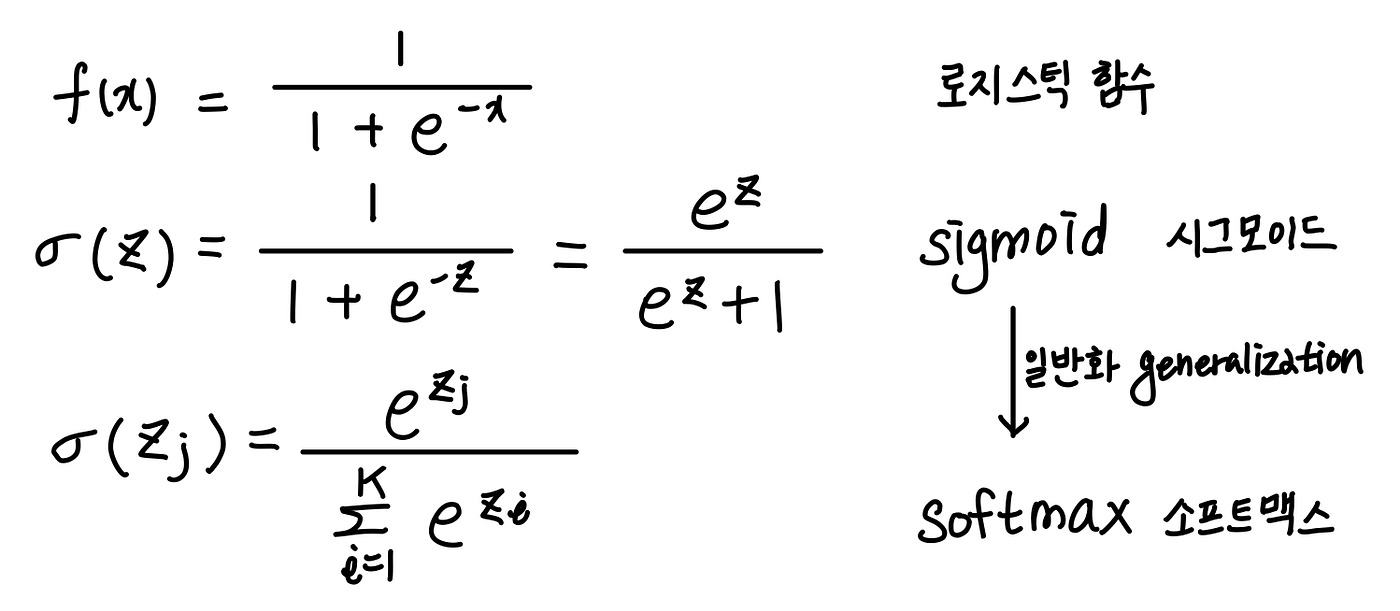

In [47]:
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1~ z7까지 값 \n")
for idx,z in enumerate(decision):
    print(f"{idx}번째 샘플의 z값\n {z}\n")

5개 샘플에 대한 z1~ z7까지 값 

0번째 샘플의 z값
 [-6.50722814  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625859
 -0.62549704]

1번째 샘플의 z값
 [-10.87900747   1.94410609   4.77600607  -2.42306183   2.98748716
   7.84171377  -4.24724379]

2번째 샘플의 z값
 [-4.33809959 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431898
 -3.87182371]

3번째 샘플의 z값
 [-0.69143994  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143404
  1.25700485]

4번째 샘플의 z값
 [-6.40138612 -1.99137623  5.81526372 -0.134644    3.49905134 -0.08753485
 -0.69937385]



In [51]:
from scipy.special import softmax
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis=1).round(2) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))


소프트맥스 함수로 예측 확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish   예측결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
